In [2]:
# 당뇨병 환자의 데이터
from sklearn.datasets import load_diabetes

diabetes = load_diabetes() # bunch class


In [6]:
# 데이터의 크기 확인하기

print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


> data는 442개의 행과 10개의 열로 구성된 2차원 배열 입니다.  
> target은 442개의 요소를 가진 1차원 배열 입니다.(열이 없음 1개라)  
> 여기서 442개를 Sample갯수라고 하며 10개를 특성(Featrue)갯수라고 합니다.  

In [9]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
# data 일부 보기 (0~2번 Sample)
diabetes.data[0:3]


array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [11]:
# target의 일부 보기
diabetes.target[:3]

array([151.,  75., 141.])

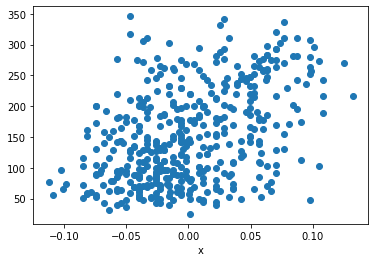

In [13]:
# 당뇨병 환자 데이터 시각화 하기 (data의 3번쨰 Feature와 Target)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.scatter(diabetes.data[:,3], diabetes.target)
plt.xlabel('x')
plt.xlabel('x')
plt.show()

In [20]:
# 상관계수 알아보기
import numpy as np

np.corrcoef(diabetes.data[:,2],diabetes.target)
#print(np.corrcoef(diabetes.data))


array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

---
# 경사하강법
: 경사하강법은 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)을 사용하여 모델을 조금씩 조정하는 최적화 알고리즘

# 예측값과 변화율
### 예측값 (y^)
예측값은 하나의 모델에서 수식의 결과로 나온 값을 의미 합니다.

### 훈련데이터에서 잘 맞는 w와 b를 찾는 방법
1. 무작위로 w와 b를 정합니다.
2. x에서 샘플하나를 선택하여 y^을 계산 합니다.
3. y^과 선택한 샘플의 진짜 y를 비교합니다. (예측한 값과 정답 비교하기 : 오차 구하기)
4. y^이 y와 가까워지도록 w,b를 조정합니다 (모델 조정하기 : 학습하기)
5. 모든 샘플을 처리할 때까지 2)~4) 항목을 반복합니다. 

In [22]:
# 훈련데이터의 Feature와 Target 정하기

x = diabetes.data[:,2]
y = diabetes.target

# 5개만 출력해보기
print(x[:5])
print(y[:5])

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]
[151.  75. 141. 206. 135.]


In [45]:
# w와 b를 초기화 하기 : 무작위로 그냥 weight와 Bias를 1로 선택
w = 1.0
b = 1.0

In [46]:
# 훈련데이터의 첫번째 Sample 데이터로 y^ 계산하기
y_hat = x[0] * w + b
y_hat

1.0616962065186886

In [47]:
# Target 과 예측 데이터 비교하기
print(y_hat)
print(y[0])

1.0616962065186886
151.0


> 당연한 결과 지만 target과 예측값이 너무 많은 차이 발생

### w값을 조절하기
: w와 b를 조금씩 변경해서 y_hat이 증가하는지 감소하는지 살펴보기

In [48]:
# 기존 w에 0.1만 증가해 보기
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc

1.0678658271705574

> y_hat보다 y_hat_inc가 조금 더 Target에 근접해짐

In [49]:
# w값 조정한 후 예측값 정도 확인하기
# w가 0.1증가 했을 떄 y_hat이 얼마나 증가했는지 계산해보기 (변화율 확인하기)
w_rate = (y_hat_inc - y_hat) / (w_inc - w )
w_rate

0.061696206518688734

> w_rate(변화율)이 x[0]의 값이 동일하다. *****

In [56]:
# 0.1로 하여서 그런가 ? 0.2로 바꾸어서 계산해보자.
w_inc = w + 0.2
y_hat_inc = w_inc * x[0] + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w )
w_rate

0.06169620651868769

In [57]:
# 훈련데이터 2로 해보자 
w_inc = w + 0.1
y_hat = x[1] * w + b
y_hat_inc = w_inc * x[1] + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w )
w_rate # 그레디언트 

-0.05147406123880644

In [62]:
# 변화율에 대한 증명이 끝났으니 다시 훈련데이터의 1번째 갑으로 변화율을 구해보자

w = b =1 
y_hat = x[0] * w + b
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.061696206518688734

In [63]:
# 변화율로 가중치를 업데이트 하기 <- 학습하기
w_new = w + w_rate
w_new

1.0616962065186888

In [68]:
# 변화율로 절편 업데이트 하기 <- 학습하기
b_inc = b + 0.1
y_hat_inc = x[0]*w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186887
1.0


In [69]:
b_new = b + 1
b_new

2

In [70]:
# (필기)오차율(오차역전파) 또는 딥러닝에서는 Learning_rate 는 다음 학습간격인 델타 x의 크기 를 말함
# 오차 연전파로 가중치와 절편을 업데이트 합니다. -> 손실함수(비율함수)를 구성합니다.
# 오차 역전파(backpropagation)는 y^과 y의 차이를 이용하여 w와 b를 업데이트 합니다.
# 오차와 변화율을 곱하여 가중치 업데이트 하기

err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + b_rate * err
print(w_new, b_new)




10.250624555904514 150.9383037934813


In [73]:
# 2번째 쌤플 x[1]을 사용하여 오차를 구하고 새로운 w와 b를 구하기
y_hat = w_new * x[1] + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err # b_rate가 1이라 그냥 1 씀
print(w_new,b_new)

-550.0723689440274 77.04814147996149


In [74]:
# 반복문을 통한 전체 샘플을 반복하기
w=b=1
for x_i,y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    
    w = w + w_rate * err
    b = b + 1 * err

print(w,b)

587.8654539985689 99.40935564531424


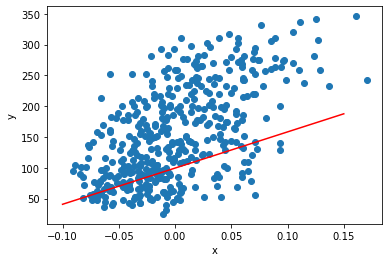

In [84]:
# 그래프로 확인해 보자
plt.scatter(x,y)
pt1 = (-0.1 , -0.1 * w + b)
pt2 = (0.15 , 0.15 * w + b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [85]:
# Epoch로 반복하기 : w의 b를 반복적으로 계산해보기
w=b=1
for _ in range(100):
    for x_i,y_i in zip(x,y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        
        w = w + w_rate * err
        b = b + 1 * err

print(w,b)

913.5973364345905 123.39414383177204


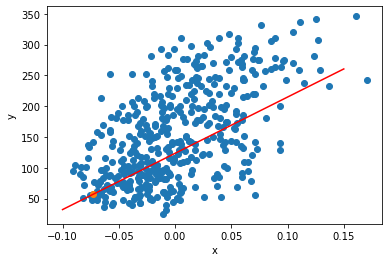

In [92]:
# 그래프로 확인해 보자
plt.scatter(x,y)
plt.scatter(x[-1],y[-1])
pt1 = (-0.1 , -0.1 * w + b)
pt2 = (0.15 , 0.15 * w + b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

> y_ = 913.6X  + 123.4

In [88]:
# 모델로 예측해 보기
x_new = 0.18
y_pred = x_new * w + b
y_pred

287.8416643899983

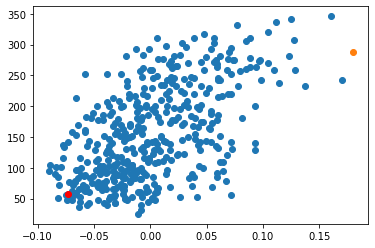

In [94]:
plt.scatter(x,y)
plt.scatter(x_new,y_pred)
plt.scatter(x[-1],y[-1], c = 'red')
plt.show()

---
# 모델 만들기 정리
1. w와 b를 임의의 값(1,1)로 초기화 하고 훈련데이터의 샘플을 하나씩 대입하여 y와 y^의 오차를 구한다.
2. 1에서 구한 오차를 w와 b의 변화율에 곱하고 이 값을 이용하여 w와 b를 업데이트 한다.
3. 만약 y^이 y보다 커지는 오차는 음수가 되어 자동으로 w와 b가 줄어드는 방향으로 업데이트가 된다.
4. 반대로 y^이 y보다 오차는 양수가 되어 w와 b는 더 커지도록 업데이트가 된다.

# 선형 회귀 위한 Class 만들기

In [101]:
class LRModel:
    # 초기화 작업
    def __init__(self):
        self.w = 1.0 # 가중치를 초기화
        self.b = 1.0 # 절편을 초기화
    
    # 정방향 계산
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
    
    # 역방향 계싼
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그레디언트를 계산
        b_grad = 1 * err # 절편에 대한 그레디언트를 계산
        return w_grad, b_grad
    
    # 훈련
    def fit(self, x, y, epoch):
        for _ in range(epoch):
            for x_i,y_i in (zip(x,y)):
                y_hat = self.forpass(x_i)
                err = (y_i - y_hat) 
                w_grad, b_grad = self.backprop(x_i,err)
                self.w += w_grad
                self.b += b_grad
        return self.w, self.b
    

In [102]:
lrmodel = LRModel()
w, b = lrmodel.fit(x,y,100)
print(w,b)

913.5973364345905 123.39414383177204


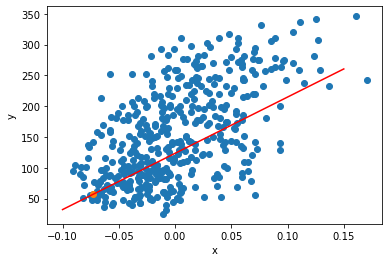

In [103]:
# 그래프로 확인해 보자
plt.scatter(x,y)
plt.scatter(x[-1],y[-1])
pt1 = (-0.1 , -0.1 * w + b)
pt2 = (0.15 , 0.15 * w + b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

---
# 용어 정리
### 선형 회귀
선형방정식을 사용하여 연속적인 값을 예측하는 알고리즘으로 데이터를 가장 잘 표현하는 방정식의 계수를 구할 수 있습니다.  
머신러닝 알고리즘 이지만 딥러닝에서 사용하는 인공신경망 알고리즘의 기초가 됩니다.  

### 경사 하강법
최적화 알고리즘 중의 하나로 핵심 훈련 알고리즘 입니다.  
이 방법은 최적의 모델을 만드는 가중치를 한번에 찾지 않습니다.  
먼저 임의로 정한 가중치에서 출력을 만든 후 타깃과 비교하여 오차를 줄이는 방향으로 가중치를 조정합니다.  
이런 과정의 모든 훈련샘플에 대해서 반복하면서 최적의 가중치를 찾습니다.  

### 손실 함수
모델이 얼마만큼의 오류가 있는 지 측정하는 기준 입니다.  
손실함수의 값을 최소로 만드는 것이 이 모델 훈련의 목적 입니다.  
다른 말로는 비용함수 또는 목적함수라고도 부릅니다.  


---
# 낙서장

In [104]:
x2 = x.copy()
y2 = y.copy()

In [105]:
err = (x*w + b - y)

In [111]:
err_li=list(err)

err_maxindex = err_li.index(err.max())


In [76]:
x.shape

(442,)

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y.reshape(1,-1))


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215 -0.08380842  0.01750591
 -0.02884001 -0.00189471 -0.02560657 -0.01806189  0.04229559  0.01211685
 -0.0105172  -0.01806189 -0.05686312 -0.02237314 -0.00405033  0.06061839
  0.03582872 -0.01267283 -0.07734155  0.05954058 -0.02129532 -0.00620595
  0.04445121 -0.06548562  0.12528712 -0.05039625 -0.06332999 -0.03099563
  0.02289497  0.01103904  0.07139652  0.01427248 -0.00836158 -0.06764124
 -0.0105172  -0.02345095  0.06816308 -0.03530688 -0.01159501 -0.0730303
 -0.04177375  0.01427248 -0.00728377  0.0164281  -0.00943939 -0.01590626
  0.0250506  -0.04931844  0.04121778 -0.06332999 -0.06440781 -0.02560657
 -0.00405033  0.00457217 -0.00728377 -0.0374625  -0.02560657 -0.02452876
 -0.01806189 -0.01482845 -0.02991782 -0.046085   -0.06979687  0.03367309
 -0.00405033 -0.02021751  0.00241654 -0.03099563  0.02828403 -0.03638469
 -0.05794093 -0.0374625   0.01211685 -0.02237314 -0.03530688  0.00996123
 -0.03961813  0.07139652 -0.07518593 -0.00620595 -0.04069594 -0.04824063
 -0.02560657  0.0519959   0.00457217 -0.06440781 -0.01698407 -0.05794093
  0.00996123  0.08864151 -0.00512814 -0.06440781  0.01750591 -0.04500719
  0.02828403  0.04121778  0.06492964 -0.03207344 -0.07626374  0.04984027
  0.04552903 -0.00943939 -0.03207344  0.00457217  0.02073935  0.01427248
  0.11019775  0.00133873  0.05846277 -0.02129532 -0.0105172  -0.04716281
  0.00457217  0.01750591  0.08109682  0.0347509   0.02397278 -0.00836158
 -0.06117437 -0.00189471 -0.06225218  0.0164281   0.09618619 -0.06979687
 -0.02129532 -0.05362969  0.0433734   0.05630715 -0.0816528   0.04984027
  0.11127556  0.06169621  0.01427248  0.04768465  0.01211685  0.00564998
  0.04660684  0.12852056  0.05954058  0.09295276  0.01535029 -0.00512814
  0.0703187  -0.00405033 -0.00081689 -0.04392938  0.02073935  0.06061839
 -0.0105172  -0.03315126 -0.06548562  0.0433734  -0.06225218  0.06385183
  0.03043966  0.07247433 -0.0191397  -0.06656343 -0.06009656  0.06924089
  0.05954058 -0.02668438 -0.02021751 -0.046085    0.07139652 -0.07949718
  0.00996123 -0.03854032  0.01966154  0.02720622 -0.00836158 -0.01590626
  0.00457217 -0.04285156  0.00564998 -0.03530688  0.02397278 -0.01806189
  0.04229559 -0.0547075  -0.00297252 -0.06656343 -0.01267283 -0.04177375
 -0.03099563 -0.00512814 -0.05901875  0.0250506  -0.046085    0.00349435
  0.05415152 -0.04500719 -0.05794093 -0.05578531  0.00133873  0.03043966
  0.00672779  0.04660684  0.02612841  0.04552903  0.04013997 -0.01806189
  0.01427248  0.03690653  0.00349435 -0.07087468 -0.03315126  0.09403057
  0.03582872  0.03151747 -0.06548562 -0.04177375 -0.03961813 -0.03854032
 -0.02560657 -0.02345095 -0.06656343  0.03259528 -0.046085   -0.02991782
 -0.01267283 -0.01590626  0.07139652 -0.03099563  0.00026092  0.03690653
  0.03906215 -0.01482845  0.00672779 -0.06871905 -0.00943939  0.01966154
  0.07462995 -0.00836158 -0.02345095 -0.046085    0.05415152 -0.03530688
 -0.03207344 -0.0816528   0.04768465  0.06061839  0.05630715  0.09834182
  0.05954058  0.03367309  0.05630715 -0.06548562  0.16085492 -0.05578531
 -0.02452876 -0.03638469 -0.00836158 -0.04177375  0.12744274 -0.07734155
  0.02828403 -0.02560657 -0.06225218 -0.00081689  0.08864151 -0.03207344
  0.03043966  0.00888341  0.00672779 -0.02021751 -0.02452876 -0.01159501
  0.02612841 -0.05901875 -0.03638469 -0.02452876  0.01858372 -0.0902753
 -0.00512814 -0.05255187 -0.02237314 -0.02021751 -0.0547075  -0.00620595
 -0.01698407  0.05522933  0.07678558  0.01858372 -0.02237314  0.09295276
 -0.03099563  0.03906215 -0.06117437 -0.00836158 -0.0374625  -0.01375064
  0.07355214 -0.02452876  0.03367309  0.0347509  -0.03854032 -0.03961813
 -0.00189471 -0.03099563 -0.046085    0.00133873  0.06492964  0.04013997
 -0.02345095  0.05307371  0.04013997 -0.02021751  0.01427248 -0.03422907
  0.00672779  0.00457217  0.03043966  0.0519959   0.06169621 -0.00728377
  0.00564998  0.05415152 -0.00836158  0.114509    0.06708527 -0.05578531
  0.03043966 -0.02560657  0.10480869 -0.00620595 -0.04716281 -0.04824063
  0.08540807 -0.01267283 -0.03315126 -0.00728377 -0.01375064  0.05954058
  0.02181716  0.01858372 -0.01159501 -0.00297252  0.01750591 -0.02991782
 -0.02021751 -0.05794093  0.06061839 -0.04069594 -0.07195249 -0.05578531
  0.04552903 -0.00943939 -0.03315126  0.04984027 -0.08488624  0.00564998
  0.02073935 -0.00728377  0.10480869 -0.02452876 -0.00620595 -0.03854032
  0.13714305  0.17055523  0.00241654  0.03798434 -0.05794093 -0.00943939
 -0.02345095 -0.0105172  -0.03422907 -0.00297252  0.06816308  0.00996123
  0.00241654 -0.03854032  0.02612841 -0.08919748  0.06061839 -0.02884001
 -0.02991782 -0.0191397  -0.04069594  0.01535029 -0.02452876  0.00133873
  0.06924089 -0.06979687 -0.02991782 -0.046085    0.01858372  0.00133873
 -0.03099563 -0.00405033  0.01535029  0.02289497  0.04552903 -0.04500719
 -0.03315126  0.097264    0.05415152  0.12313149 -0.08057499  0.09295276
 -0.05039625 -0.01159501 -0.0277622   0.05846277  0.08540807 -0.00081689
  0.00672779  0.00888341  0.08001901  0.07139652 -0.02452876 -0.0547075
 -0.03638469  0.0164281   0.07786339 -0.03961813  0.01103904 -0.04069594
 -0.03422907  0.00564998  0.08864151 -0.03315126 -0.05686312 -0.03099563
  0.05522933 -0.06009656  0.00133873 -0.02345095 -0.07410811  0.01966154
 -0.01590626 -0.01590626  0.03906215 -0.0730303 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.